# INR prediction based on INR-USD Exchange Rate

By ``Abhijeet Srivastav``

**Connect with me**
- [LinkedIn](https://www.linkedin.com/in/abhijeet-srivastav-02245a18b/)
- [Github](https://github.com/AbhijeetSrivastav/Data-Science-Guide)
- [Social](https://www.instagram.com/abhijeet.codes/)

**AIM-** Predicting rate of INR based on stock data

**Dataset Information**

- Real time historical data sourced from Yahoo Finance
- This dataset has 263 rows and 8 features
- Dataset [Source](https://finance.yahoo.com/quote/INR%3DX/history/?fr=sycsrp_catchall)

**Attribute Information**
1. Date: Dates
2. Open: The Stock at which opens at the start of market
3. High: The particular stock which made high during that particular day
4. Low:The Particular stock which made Low during that particular day
5. Close: The stock closing at the end of the Market hours
6. Adj Close: Stock's closing price to reflect that stock's value after accounting for any corporate actions
7. Volume: The total number of shares traded on that particular day

**Target and input features**
- Our target feature is close (final price of inr)

## 0. Required Imports

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from scipy import stats

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Data Collection

In [3]:
df = pd.read_csv('../../Dataset/INR=X.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-09,73.917099,74.152496,73.830299,73.918503,73.918503,0
1,2021-11-10,74.174797,74.407997,74.051498,74.174797,74.174797,0
2,2021-11-11,74.404999,74.578499,74.272797,74.404900,74.404900,0
3,2021-11-12,74.326698,74.528702,74.293503,74.322098,74.322098,0
4,2021-11-15,74.347000,74.588303,74.312500,74.339996,74.339996,0


## 2. Data Preprocessing - First Pass

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,77.563335,77.848996,77.373046,77.561531,77.561531,0.0
std,2.548608,2.599641,2.532519,2.549447,2.549447,0.0
min,73.782799,74.034302,73.697502,73.799103,73.799103,0.0
25%,75.408228,75.585251,75.123551,75.385300,75.385300,0.0
50%,77.315948,77.518749,77.133503,77.315948,77.315948,0.0
75%,79.644253,79.918373,79.432278,79.644253,79.644253,0.0
max,82.997002,83.386002,82.668800,82.997002,82.997002,0.0


### 2.1. Checking for null values

<AxesSubplot:>

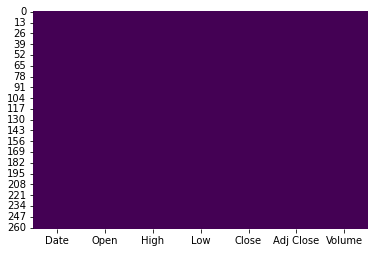

In [14]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [16]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

**Observation:** Their are no null values

### 2.2. Checking for NA values

In [17]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

**Observation:** Their is no NA values

### 2.3. Checking the data type of features

In [18]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

**Observation:** All the features are of correct data type.

## 3. Exploratory Data Analysis

### 3.1. Detecting outliers using Boxplot

In [39]:
num_features = [feature for feature in df.columns if df[feature].dtype !='O']

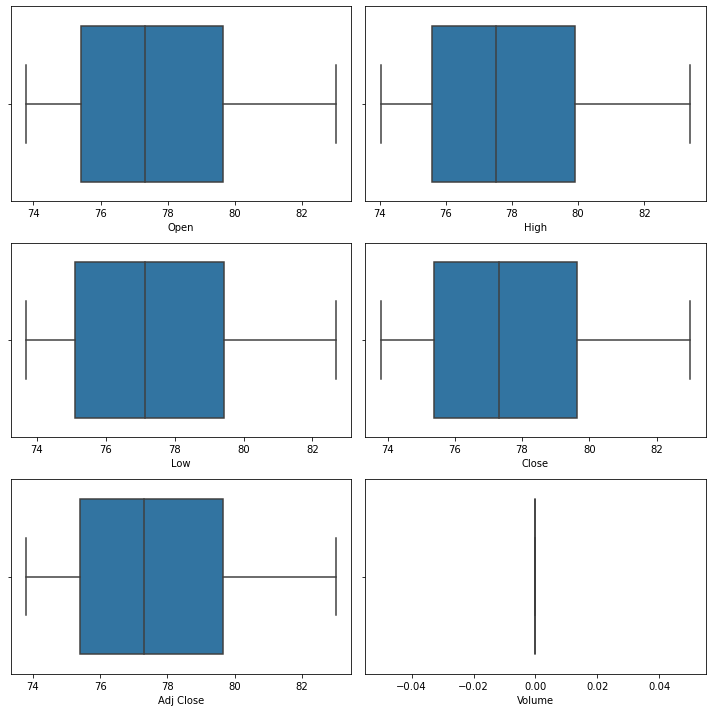

In [48]:
n = 1
plt.figure(figsize=(10, 10))
for feature in num_features:
    plt.subplot(3, 2, n)
    n += 1
    sns.boxplot(df[feature])
    plt.tight_layout()

**Observation:** No outliers detected in visual inspection.

### 3.2. Detecting outliers by z-score

In [49]:
z_scores = []
for feature in num_features:
    z_scores.append(np.abs(stats.zscore(df[feature])))

In [50]:
z_scores

[0      1.433416
 1      1.332109
 2      1.241611
 3      1.272393
 4      1.264412
          ...   
 257    2.093399
 258    2.012182
 259    1.734322
 260    1.675746
 261    1.510321
 Name: Open, Length: 262, dtype: float64,
 0      1.424649
 1      1.326177
 2      1.260465
 3      1.279657
 4      1.256686
          ...   
 257    1.983795
 258    1.982060
 259    1.743111
 260    1.631343
 261    1.472556
 Name: High, Length: 262, dtype: float64,
 0      1.401580
 1      1.314069
 2      1.226519
 3      1.218327
 4      1.210812
          ...   
 257    2.095103
 258    1.831343
 259    1.748423
 260    1.503295
 261    1.510180
 Name: Low, Length: 262, dtype: float64,
 0      1.431683
 1      1.330961
 2      1.240533
 3      1.273073
 4      1.266039
          ...   
 257    2.093419
 258    2.012229
 259    1.734460
 260    1.675904
 261    1.510533
 Name: Close, Length: 262, dtype: float64,
 0      1.431683
 1      1.330961
 2      1.240533
 3      1.273073
 4      1.266039

lets set the threshold value of z-score to 3

In [54]:
threshold = 3
for z in z_scores:
    print(np.where(z > threshold))


(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


**Observation:** It can be observed that their is no value of z-score greater than threshold for any of the numerical features.

### 3.3. Correlation of features

In [55]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997669,0.997881,0.999911,0.999911,NaN
High,0.997669,1.000000,0.997486,0.997659,0.997659,NaN
Low,0.997881,0.997486,1.000000,0.997926,0.997926,NaN
Close,0.999911,0.997659,0.997926,1.000000,1.000000,NaN
Adj Close,0.999911,0.997659,0.997926,1.000000,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

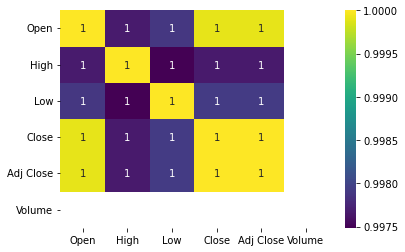

In [56]:
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='viridis')

**Observation:** 
- We can observe that all  features are somewhat correlated to each other.
- High multi collinearity  present here and need to be handled.

### 3.4. Checking distribution of features

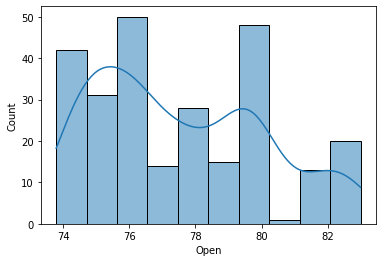

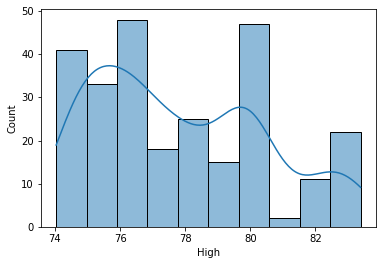

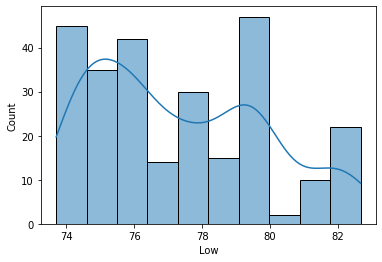

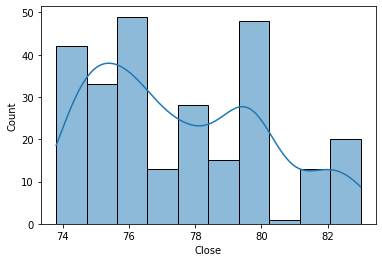

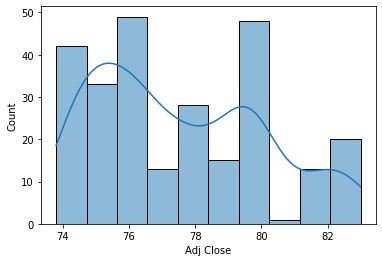

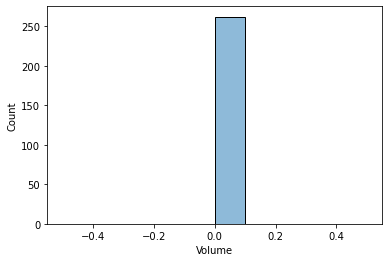

In [59]:
for feature in num_features:
    sns.histplot(data=num_feature_df, x=feature, kde=True, bins=10)
    plt.show()

**Observation:** None of the feature is normally distributed and need to be transformed to be normally distributed.

## 4. Analytical observations

### 4.1. How is the target feature (Close) related to rest of input features?

In [65]:
target_feature = df['Close']
input_features = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

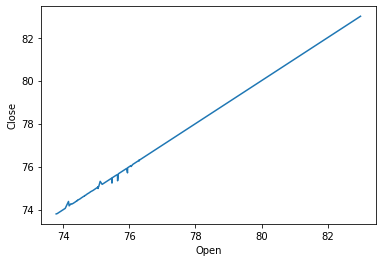

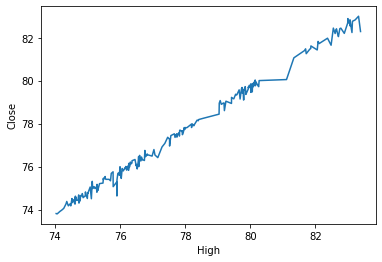

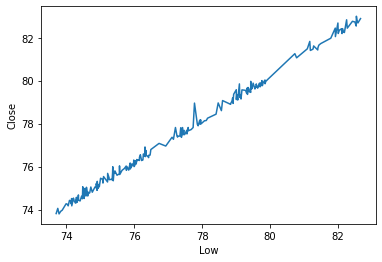

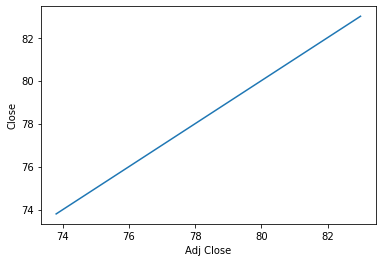

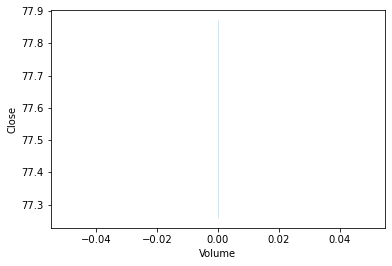

In [77]:
for input_feature in input_features:
    sns.lineplot(data=df, x=df[input_feature], y=target_feature)
    plt.show()

**Observation:** 
- Close and Open have highly linear relationship.
- Close and Adj Close have highly linear relationship.
- Close and Volume has no linear relationship.
- Close and and low has moderate linear relationship.
- Close and high has moderate linear relationship.

### 4.2. What is the max value of INR and when ?

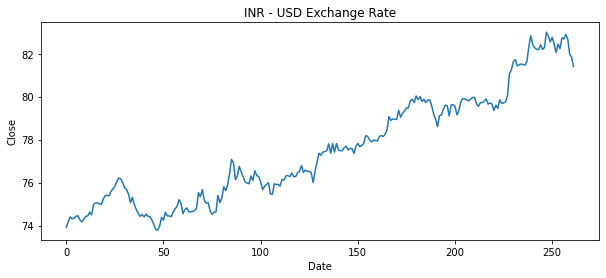

In [95]:
plt.figure(figsize=(10, 4))
plt.title('INR - USD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.show()

In [94]:
df[df['Close'] == df['Close'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
247,2022-10-20,82.997002,83.324997,82.546997,82.997002,82.997002,0


**Observation:** On 2022-10-20 value of INR was 82.997002 which is highest till date.

## 5. Data Preprocessing - Second Pass

### 5.1. Removing redundant features

We observed in section 5.3 that Volume has no correlation with any feature so we will drop it.

In [97]:
df.drop('Volume', inplace=True, axis=1)

### 5.2. Treating Multicollinearity

We can use methods such as:
- PCA 
- Drop the correlated features (not possible here)
- Ridge Regression
- Centred variables using VIF

But we are going to use the Ridge Regression to build our model which will drop the irrelevant features by itself.

## 6. Model 

### 6.1. Feature segregation

In [102]:
y = df['Close']
x = df[['Open', 'High', 'Low', 'Adj Close']]

### 6.2. Train Test Split

In [116]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### 6.3. Feature Scaling

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [119]:
x_train = scaler.fit_transform(x_train)

In [120]:
x_test = scaler.transform(x_test)

In [123]:
x_train

array([[-4.01183752e-01, -3.88349585e-01, -3.85870633e-01,
        -3.99567997e-01],
       [-7.93819419e-01, -8.91853414e-01, -8.85021673e-01,
        -8.86217302e-01],
       [-8.02375222e-01, -6.72846978e-01, -7.67832604e-01,
        -8.00445906e-01],
       [-5.84151340e-01, -4.62768237e-01, -5.18255884e-01,
        -5.82392582e-01],
       [-9.54208543e-01, -1.00126166e+00, -9.28218044e-01,
        -9.52160559e-01],
       [-1.05426933e+00, -1.10169735e+00, -1.06212595e+00,
        -1.04913221e+00],
       [-4.58653941e-02, -2.83383008e-02,  4.00112420e-02,
        -4.45273466e-02],
       [-9.88709436e-01, -9.88468634e-01, -1.08400511e+00,
        -9.86634487e-01],
       [-1.19996120e+00, -1.18048760e+00, -1.23919064e+00,
        -1.19772115e+00],
       [-5.64069227e-01, -6.18670000e-01, -6.03449938e-01,
        -5.80652994e-01],
       [-1.40986537e+00, -1.40671334e+00, -1.38365676e+00,
        -1.40690554e+00],
       [ 3.07394327e-01,  3.13378015e-01,  3.47462564e-01,
      

### 6.4. Simple Linear Regression Model Training

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
simple_reg_model = LinearRegression()

In [128]:
simple_reg_model.fit(x_train, y_train)

LinearRegression()

### 6.5. Ridge Regression Model Training

In [129]:
from sklearn.linear_model import Ridge

In [131]:
ridge_reg_model = Ridge()

In [132]:
ridge_reg_model.fit(x_train, y_train)

Ridge()

### 6.6. Value of coefficients(slopes) and intercept of the models

#### 6.6.1. Linear Model

In [135]:
simple_reg_model.coef_

array([-1.42083258e-16, -2.85066883e-15,  6.28386348e-15,  2.52645999e+00])

In [136]:
simple_reg_model.intercept_

77.47299355980864

#### 6.6.2. Ridge Model

In [137]:
ridge_reg_model.coef_

array([0.84682036, 0.36217582, 0.42829901, 0.88658326])

In [138]:
ridge_reg_model.intercept_

77.47299355980863

### 6.7. Performance metrics 

#### 6.7.1. Linear Model

In [140]:
from sklearn.metrics import r2_score

In [141]:
simple_y_pred = simple_reg_model.predict(x_test)

In [142]:
r_squared = r2_score(y_test, simple_y_pred)

In [152]:
adj_r_squared = 1 - ((1-r_squared)*(len(y_test)-1)/((len(y_test-1) - x_test.shape[1]-1)))

In [154]:
r_squared, adj_r_squared

(1.0, 1.0)

#### 6.7.2. Ridge Model

In [155]:
ridge_y_pred = ridge_reg_model.predict(x_test)

In [156]:
r_squared = r2_score(y_test, ridge_y_pred)

In [159]:
adj_r_squared = 1 - ((1-r_squared)*(len(y_test)-1)/((len(y_test-1) - x_test.shape[1]-1)))

In [160]:
r_squared, adj_r_squared

(0.9995404444702144, 0.9995021481760656)

## 7. Pickling

## 7.1 Dumping the models

In [161]:
import pickle

In [163]:
model_simp = pickle.dump(simple_reg_model, open('simple_reg_model.sav', 'wb'))

In [164]:
model_ridge = pickle.dump(ridge_reg_model, open('ridge_reg_model.sav', 'wb'))

## 7.2 Loading the models

In [ ]:
# simp_reg_model = pickle.load(open('simple_reg_model.sav'))
# ridge_reg_model = pickle.load(open('ridge_reg_model.sav'))